In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

In [3]:
df_cab = pd.read_csv("cab_rides.csv")
df_cab.reset_index(drop=True, inplace=True)

In [4]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
distance            693071 non-null float64
cab_type            693071 non-null object
time_stamp          693071 non-null int64
destination         693071 non-null object
source              693071 non-null object
price               637976 non-null float64
surge_multiplier    693071 non-null float64
id                  693071 non-null object
product_id          693071 non-null object
name                693071 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
df_cab.shape

(693071, 10)

In [6]:
df_cab = df_cab.iloc[0:500, :]
df_cab.shape

(500, 10)

In [7]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux


In [8]:
df_cab.describe()

,distance,time_stamp,price,surge_multiplier
count,500.000000,5.000000e+02,462.000000,500.000000
mean,2.132760,1.544040e+12,16.027056,1.005000
std,0.943885,6.892136e+08,8.537707,0.035035
min,0.440000,1.543209e+12,3.000000,1.000000
25%,1.160000,1.543443e+12,9.500000,1.000000
50%,2.320000,1.543747e+12,13.500000,1.000000
75%,3.020000,1.544828e+12,22.500000,1.000000
max,4.430000,1.545160e+12,42.500000,1.250000


In [9]:
df_cab.isnull().sum()

distance             0
cab_type             0
time_stamp           0
destination          0
source               0
price               38
surge_multiplier     0
id                   0
product_id           0
name                 0
dtype: int64

In [10]:
df_cab['cab_type'].value_counts()

Uber    268
Lyft    232
Name: cab_type, dtype: int64

In [11]:
df_cab['destination'].value_counts()

North Station              70
North End                  59
Fenway                     58
West End                   55
Theatre District           45
Beacon Hill                43
Northeastern University    41
South Station              33
Back Bay                   31
Haymarket Square           24
Financial District         21
Boston University          20
Name: destination, dtype: int64

In [12]:
df_cab['source'].value_counts()

Haymarket Square           66
North End                  64
North Station              63
Theatre District           45
West End                   40
South Station              39
Back Bay                   38
Beacon Hill                36
Fenway                     33
Boston University          32
Northeastern University    31
Financial District         13
Name: source, dtype: int64

In [13]:
df_cab['surge_multiplier'].value_counts()

1.00    490
1.25     10
Name: surge_multiplier, dtype: int64

In [14]:
df_cab['name'].value_counts()

WAV             40
UberX           40
Lyft XL         40
Lux             39
Lux Black XL    39
Lux Black       39
Black           38
Taxi            38
Lyft            38
Black SUV       38
Shared          37
UberXL          37
UberPool        37
Name: name, dtype: int64

In [15]:
df_cab['time_stamp'] = df_cab['time_stamp'].astype(str).str[:-3].astype(np.int64)
df_cab

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [16]:
import datetime
#convert 13digit time stamp to datetime format
df_cab['time']= pd.to_datetime(df_cab['time_stamp'], unit='s')
df_cab['date']= df_cab['time'].dt.date
#extract hours only
#df_cab['hour']= df['time'].dt.hour
df_cab['fare_per_mile']= round(df_cab.price/df_cab.distance,2)

In [17]:
df_cab.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,1544952607,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07,2018-12-16,11.36
1,0.44,Lyft,1543284023,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23,2018-11-27,25.00


In [18]:
del df_cab['time_stamp']

In [19]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
distance            500 non-null float64
cab_type            500 non-null object
destination         500 non-null object
source              500 non-null object
price               462 non-null float64
surge_multiplier    500 non-null float64
id                  500 non-null object
product_id          500 non-null object
name                500 non-null object
time                500 non-null datetime64[ns]
date                500 non-null object
fare_per_mile       462 non-null float64
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 47.0+ KB


In [21]:
#df_cab['fare_per_mile'].isnull().sum()
df_cab['fare_per_mile']=df_cab['fare_per_mile'].astype(float)
df_cab['fare_per_mile'].fillna('2.8',inplace=True)
df_cab['price'] = df_cab['fare_per_mile']*df_cab['distance']

In [22]:
df_cab.price.isnull().sum()

0

In [23]:
df_cab

,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time,date,fare_per_mile
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07,2018-12-16,11.36
1,0.44,Lyft,North Station,Haymarket Square,11.0000,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23,2018-11-27,25.00
2,0.44,Lyft,North Station,Haymarket Square,7.0004,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22,2018-11-28,15.91
3,0.44,Lyft,North Station,Haymarket Square,25.9996,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02,2018-11-30,59.09
4,0.44,Lyft,North Station,Haymarket Square,8.9980,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20,2018-11-29,20.45
5,0.44,Lyft,North Station,Haymarket Square,16.5000,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,2018-12-17 18:25:12,2018-12-17,37.50
6,1.08,Lyft,Northeastern University,Back Bay,10.4976,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL,2018-11-26 05:03:00,2018-11-26,9.72
7,1.08,Lyft,Northeastern University,Back Bay,16.5024,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black,2018-12-02 19:53:04,2018-12-02,15.28
8,1.08,Lyft,Northeastern University,Back Bay,3.0024,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared,2018-12-03 06:28:02,2018-12-03,2.78
9,1.08,Lyft,Northeastern University,Back Bay,27.4968,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL,2018-11-27 10:45:22,2018-11-27,25.46


In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,10 

Text(0.5, 1, 'DATA SUMMARY')

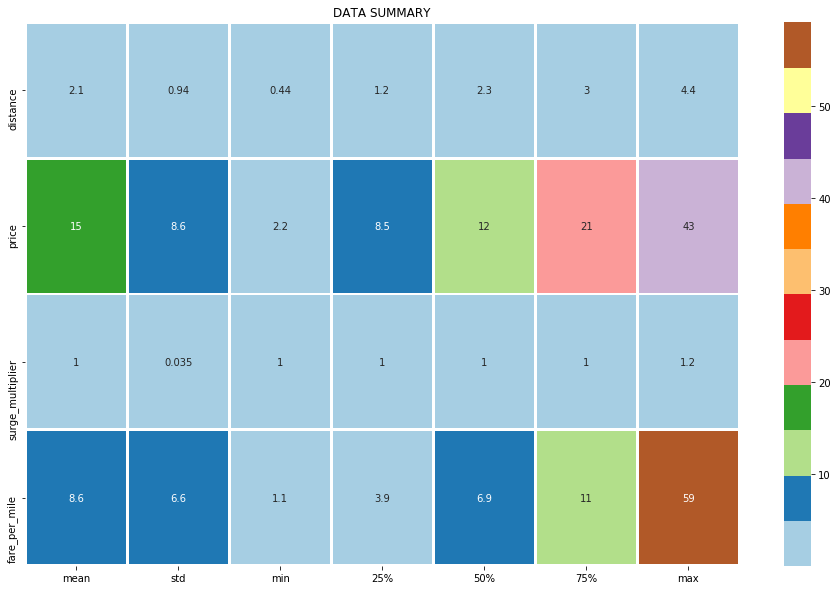

In [25]:
sns.heatmap(df_cab.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

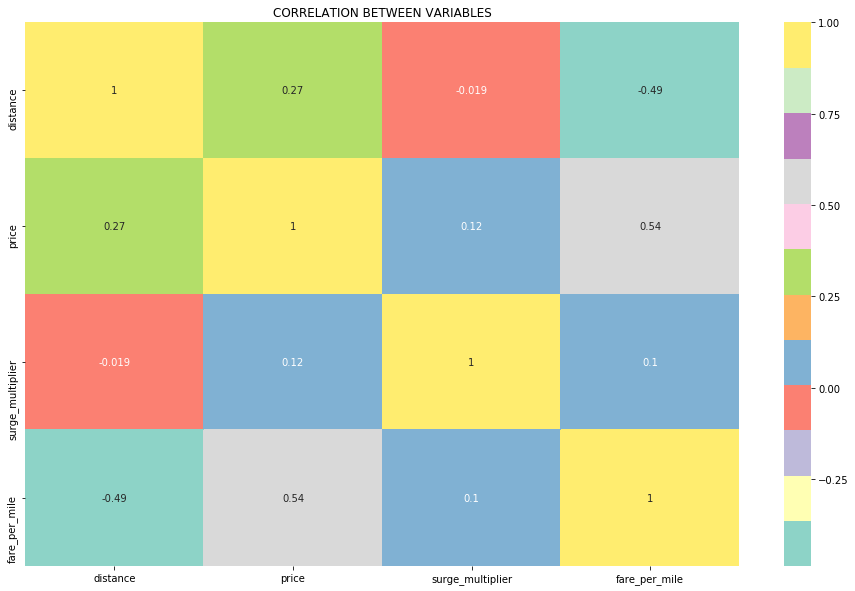

In [26]:
df_corr = df_cab.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

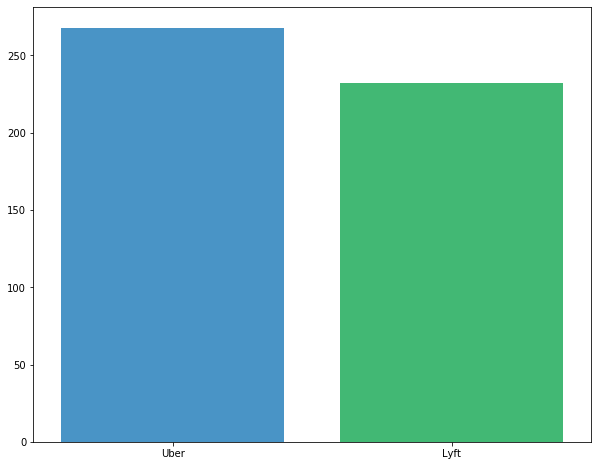

In [27]:
plt.figure(figsize=(10,8))
flatui = [ "#3498db", "#2ecc71"]
x=['Uber','Lyft']
y = [df_cab.cab_type[(df_cab.cab_type)=='Uber'].count(),df_cab.cab_type[(df_cab.cab_type)=='Lyft'].count()]
vis1= sns.barplot(x,y,palette=flatui)

In [28]:
df_weather=pd.read_csv("weather.csv")
df_weather.head(2)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32


In [29]:
df_weather['time']= pd.to_datetime(df_weather['time_stamp'], unit='s')
df_weather['date']=df_weather['time'].dt.date
del df_weather['time_stamp']
df_weather.head(2)

,temp,location,clouds,pressure,rain,humidity,wind,time,date
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16 23:45:01,2018-12-16
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16 23:45:01,2018-12-16


In [30]:
df_weather['rain'].fillna(0,inplace=True)

In [31]:
df_merged= pd.merge(df_cab,df_weather, right_on='date',left_on='date',how='left') 
df_merged.head(2)


,distance,cab_type,destination,source,price,surge_multiplier,id,product_id,name,time_x,date,fare_per_mile,temp,location,clouds,pressure,rain,humidity,wind,time_y
0,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07,2018-12-16,11.36,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16 23:45:01
1,0.44,Lyft,North Station,Haymarket Square,4.9984,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07,2018-12-16,11.36,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16 23:45:01


In [32]:
df_merged.isnull().sum()


distance            0
cab_type            0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
time_x              0
date                0
fare_per_mile       0
temp                0
location            0
clouds              0
pressure            0
rain                0
humidity            0
wind                0
time_y              0
dtype: int64

In [33]:
df_merged.shape

(230736, 20)

Text(0.5, 1, 'DATA SUMMARY')

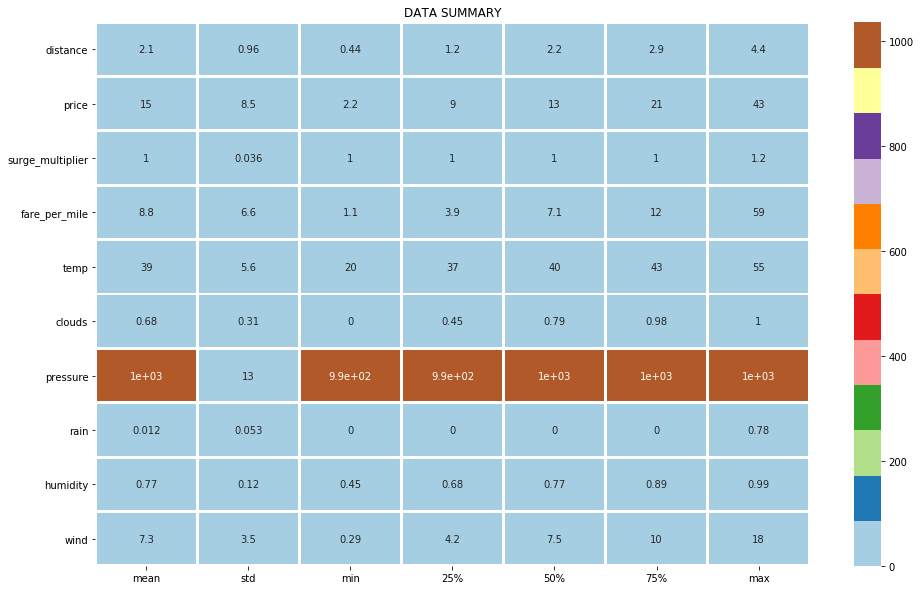

In [34]:
sns.heatmap(df_merged.describe()[1:].transpose(),annot=True,linecolor='w',linewidth=2,cmap=sns.color_palette('Paired'))
plt.title("DATA SUMMARY")

Text(0.5, 1, 'CORRELATION BETWEEN VARIABLES')

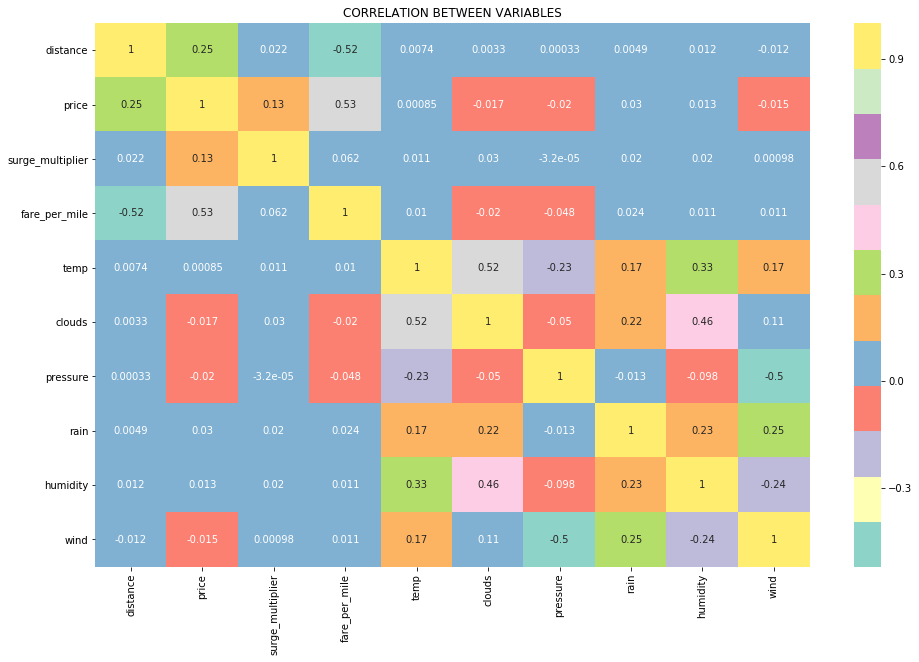

In [35]:
df_corr = df_merged.corr()
sns.heatmap(df_corr, cmap =sns.color_palette("Set3"),annot = True)
plt.title("CORRELATION BETWEEN VARIABLES")

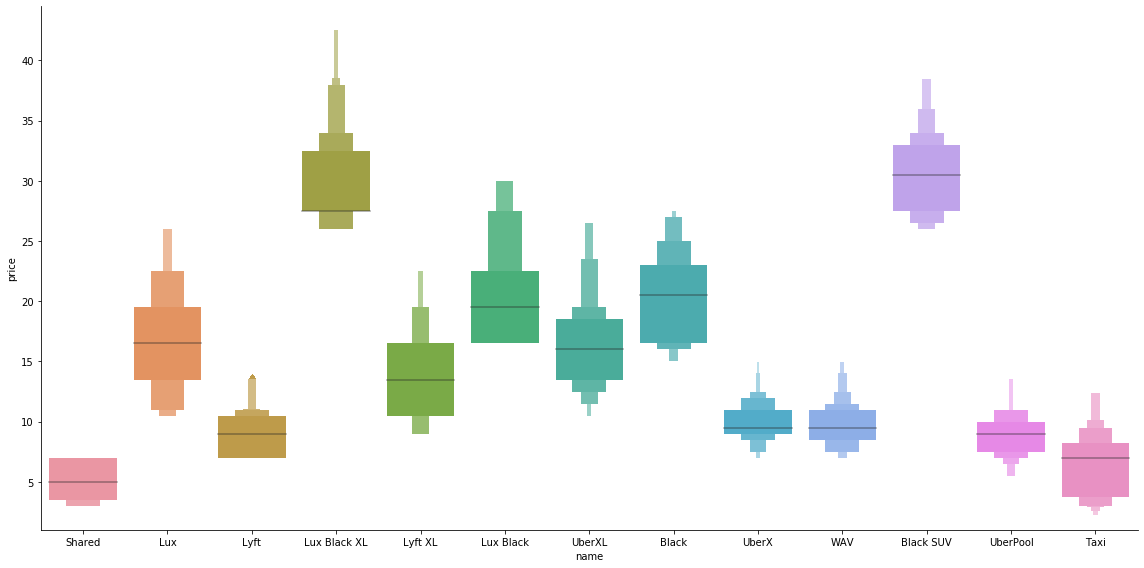

In [36]:
sns.catplot(x="name", y="price", data=df_merged,kind="boxen", height=8, aspect=2);

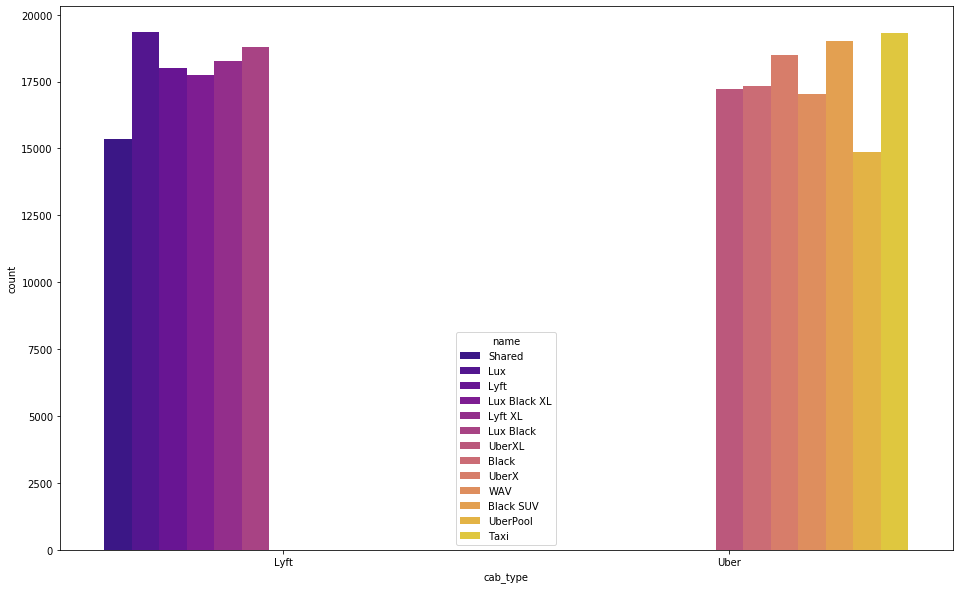

In [37]:
sns.countplot(df_merged['cab_type'],hue=df_merged['name'], palette='plasma')

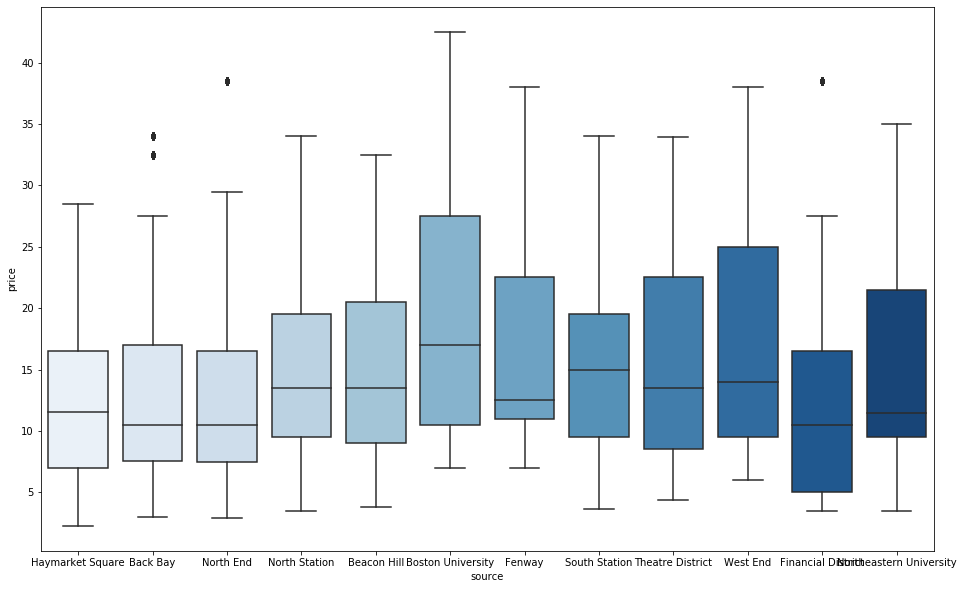

In [38]:
sns.boxplot(data=df_merged, x='source',y='price',palette='Blues')

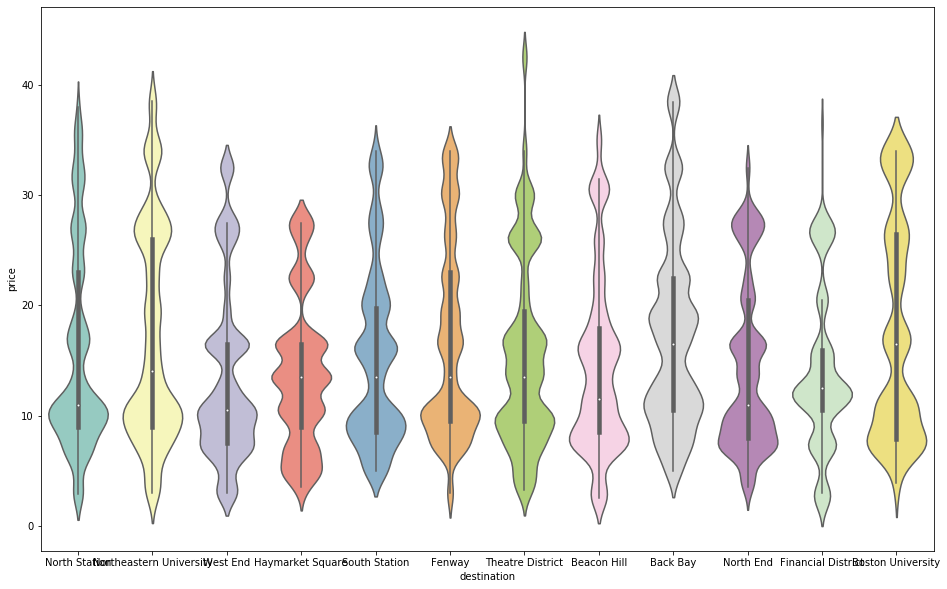

In [39]:
sns.violinplot(data=df_merged, x='destination', y='price',palette="Set3",scale="width")


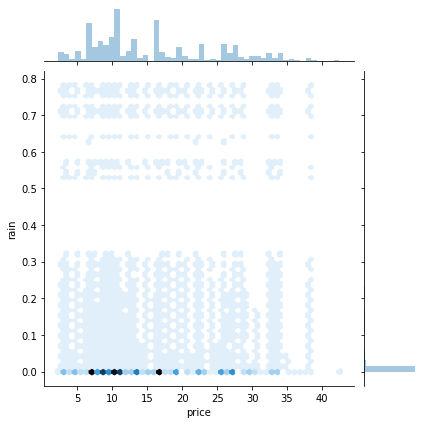

In [40]:
sns.jointplot("price", "rain", data=df_merged, kind="hex",bins=15)

name
Black           AxesSubplot(0.125,0.125;0.775x0.755)
Black SUV       AxesSubplot(0.125,0.125;0.775x0.755)
Lux             AxesSubplot(0.125,0.125;0.775x0.755)
Lux Black       AxesSubplot(0.125,0.125;0.775x0.755)
Lux Black XL    AxesSubplot(0.125,0.125;0.775x0.755)
Lyft            AxesSubplot(0.125,0.125;0.775x0.755)
Lyft XL         AxesSubplot(0.125,0.125;0.775x0.755)
Shared          AxesSubplot(0.125,0.125;0.775x0.755)
Taxi            AxesSubplot(0.125,0.125;0.775x0.755)
UberPool        AxesSubplot(0.125,0.125;0.775x0.755)
UberX           AxesSubplot(0.125,0.125;0.775x0.755)
UberXL          AxesSubplot(0.125,0.125;0.775x0.755)
WAV             AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

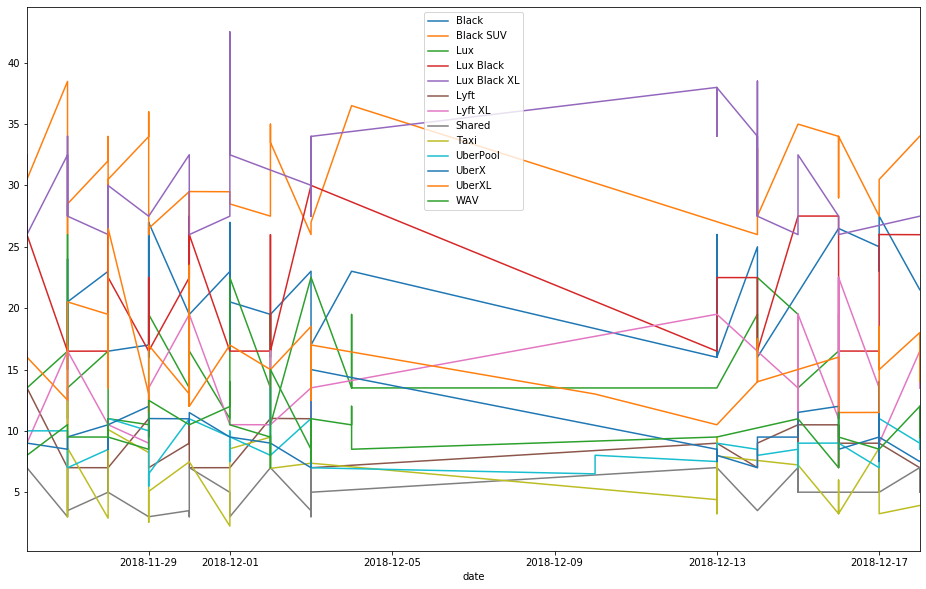

In [41]:
df_merged.set_index('date').groupby('name')['price'].plot(legend=True)

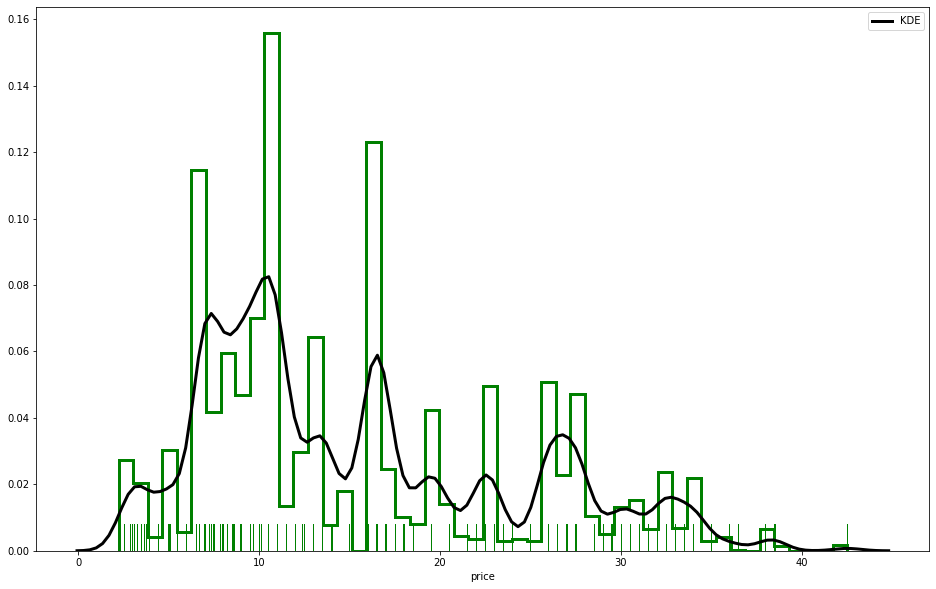

In [43]:
sns.distplot(df_merged.price, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

In [42]:
#import plotly.express as px
#tips = px.data.tips()
#fig = px.histogram(tips, x="total_bill", y="tip", color="sex",
                   #marginal="box", # or violin, rug
                   #hover_data=tips.columns)
#fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
from sklearn.model_selection import train_test_split
df_X1 = df_merged.loc[:, df_merged.columns != 'price']
df_X2 = df_X1.loc[:, df_X1.columns != 'time_x']
df_X = df_X2.loc[:, df_X2.columns != 'time_y']
df_y = df_merged[['price']]
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)
print(X_train.count())
print(X_test.count())

In [ ]:
x_norm_train = pd.get_dummies(X_train)
x_norm_test = pd.get_dummies(X_test)

In [ ]:
x_norm_train.info()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_norm_train)
x_std_train = scaler.transform(x_norm_train)
x_std_test = scaler.transform(x_norm_test)

In [ ]:
print('Mean:',np.mean(x_std_train))
print('Standard Deviation',np.std(x_std_train))
print('Mean:',np.mean(x_std_test))
print('Standard Deviation',np.std(x_std_test))


In [ ]:
df_x_std_train = pd.DataFrame(x_std_train, columns=x_norm_train.columns)
df_x_std_test = pd.DataFrame(x_std_test, columns=x_norm_test.columns)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [ ]:
pca.fit(df_x_std_train)

In [ ]:
pca.n_components_

In [ ]:
df_x_std_train = pca.transform(df_x_std_train)
df_x_std_test = pca.transform(df_x_std_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(df_x_std_train, y_train.values.ravel())

In [ ]:
predictions = rf.predict(df_x_std_test[0].reshape(1,-1))
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')